# Choropleth with Vietnam GeoJson

## 1. Set up
### 1.1 Data set
- Source: https://www.kaggle.com/datasets/tdbui1209/vietnam-national-hs-graduation-examination-2021
- I've extracted the province of each participant in the dataset by extracting the first 2 digits of the ID and match them by provincial code.

### 1.2 Geographical files
- The processed geojson (source: https://gadm.org/country) files from last tutorial is used.

## 2. Process

First, let's set up our environment and ultility.

In [110]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geoplot as gplt
import geoplot.crs as gcrs
import cartopy.crs as ccrs


# Load geojson data
data_lv1 = gpd.read_file('../geo_data/gadm41_VNM_1.json')

# Load dataset
exam2021 = pd.read_csv('../example_data/2021-national-exam-result.csv', index_col=0)
exam2021 = pd.merge(exam2021, data_lv1, left_on='province', right_on='VARNAME_1')

# Let's take a peak at the datasets
print("Geodata columns: ", data_lv1.columns)
print("\nExam dataset columns: ",exam2021.columns)

Geodata columns:  Index(['id', 'GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')

Exam dataset columns:  Index(['id_examinee', 'math', 'physics', 'chemistry', 'biology', 'history',
       'geography', 'literature', 'civic_education', 'english', 'russian',
       'french', 'chinese', 'german', 'japanese', 'SBD_province', 'province',
       'id', 'GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


In [ ]:
# Create base count group for all province
# I separated this out because it's takes a long time to run this :")
exam2021_cnt = exam2021.groupby(['province', 'geometry']).count()

In [121]:
# Ultility
def drawChoropleth(data, subject, title, axes = None):
    extent = [103.02301, 9.17682, 109.32094, 22.82333]
    ax = gplt.choropleth(
        data, hue=subject, projection=gcrs.AlbersEqualArea(),
        edgecolor='black', linewidth=1,
        cmap='Greens', legend=True,
        scheme='FisherJenks',
        # figsize=(12, 16), 
        ax=axes)

    ax.set_title(title)
    legend = ax.get_legend()
    if legend:
        legend.set_bbox_to_anchor((0, 1))
        legend_prop = legend.get_texts()
        plt.setp(legend_prop, fontsize=7)  # 

def makeGeopandas(data):
    res = gpd.GeoDataFrame(data,crs="EPSG:4326", geometry='geometry')
    return res

# This function is to create ratio geodataframe
def calculateRatioGeopandas(subject, grade):
    good_cnt = exam2021[exam2021[subject] >= grade].groupby(['province', 'geometry']).count()
    return makeGeopandas((round(good_cnt[subject] / exam2021_cnt[subject], 3)).reset_index())    
    
# This function is to create descritive statistics which is pretty basic    
def calculateDescriptiveStatistic(ds):
    exam2019_by_province_ds = exam2021.groupby(['province', 'geometry'])[['math', 'physics', 'chemistry', 'biology', 'history',
       'geography', 'literature', 'civic_education', 'english', 'russian',
       'french', 'chinese', 'german', 'japanese']].agg(ds)
    return exam2019_by_province_ds.reset_index(inplace=True)

### 2. Drawing choropleth

Now we just have to use our function and apply it to practice.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kw

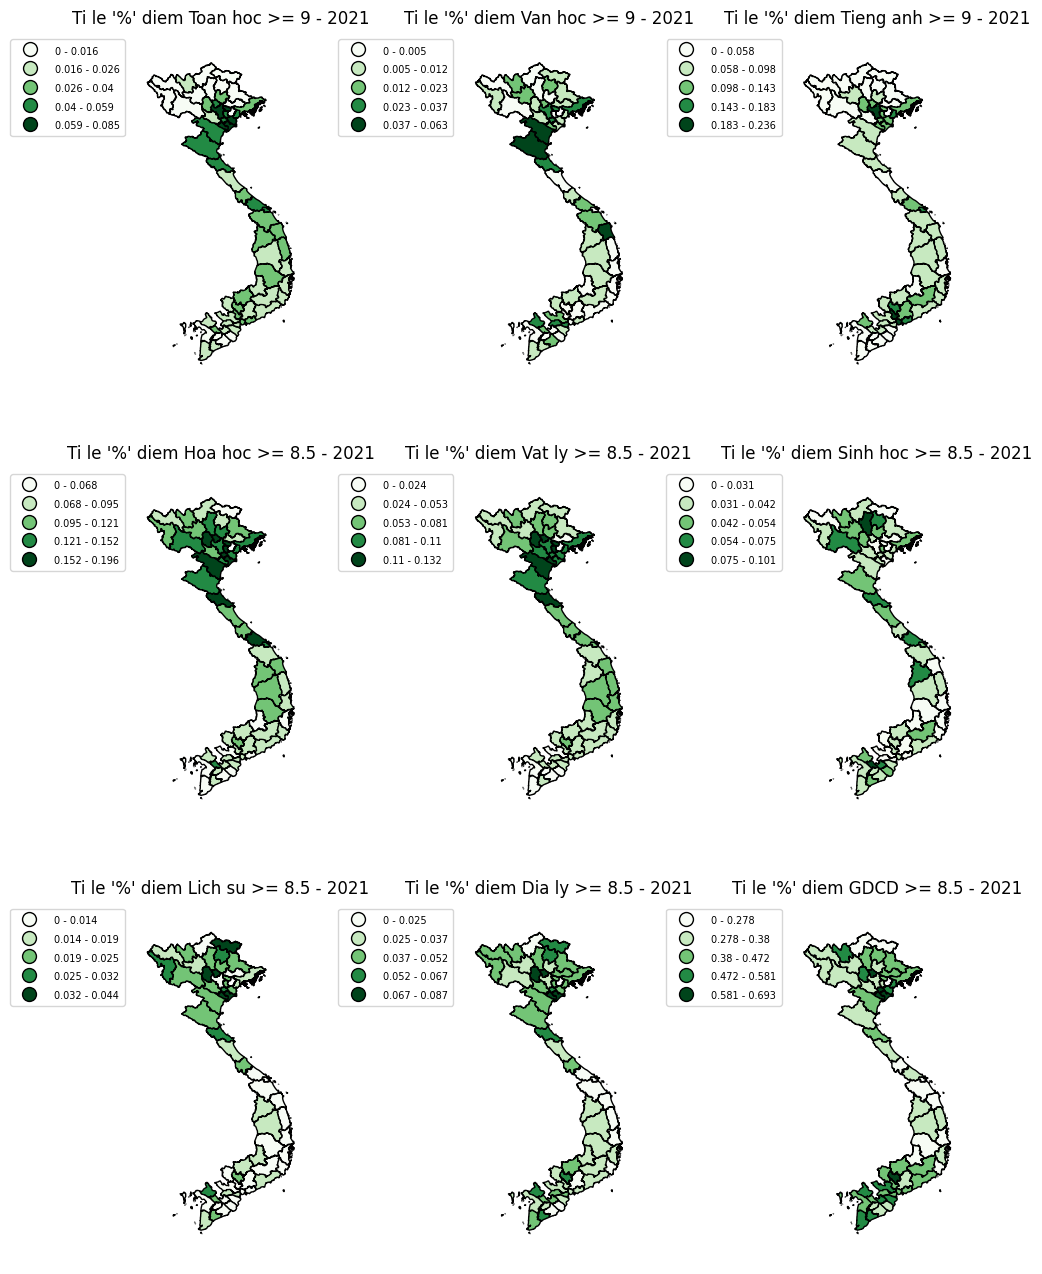

In [122]:
# Because we're hashing geopandas so when ploting, we need to set up geoaxis
# This code: "subplot_kw={'projection': ccrs.PlateCarree()}" is for that.
# See more: https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html

fig, ax = plt.subplots(3,3, figsize = (12, 16),subplot_kw={'projection': ccrs.PlateCarree()})
drawChoropleth(makeGeopandas((calculateRatioGeopandas('math', 9)).reset_index()), "math", "Ti le '%' diem Toan hoc >= 9 - 2021", ax[0,0])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('literature', 9)).reset_index()), "literature", "Ti le '%' diem Van hoc >= 9 - 2021", ax[0,1])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('english', 9)).reset_index()), "english", "Ti le '%' diem Tieng anh >= 9 - 2021", ax[0,2])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('chemistry', 8.5)).reset_index()), "chemistry", "Ti le '%' diem Hoa hoc >= 8.5 - 2021", ax[1,0])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('physics', 8.5)).reset_index()), "physics", "Ti le '%' diem Vat ly >= 8.5 - 2021", ax[1,1])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('biology', 8.5)).reset_index()), "biology", "Ti le '%' diem Sinh hoc >= 8.5 - 2021", ax[1,2])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('history', 9)).reset_index()), "history", "Ti le '%' diem Lich su >= 8.5 - 2021", ax[2,0])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('geography', 9)).reset_index()), "geography", "Ti le '%' diem Dia ly >= 8.5 - 2021", ax[2,1])
drawChoropleth(makeGeopandas((calculateRatioGeopandas('civic_education', 9)).reset_index()), "civic_education", "Ti le '%' diem GDCD >= 8.5 - 2021", ax[2,2])